### 1. Import Library

Sel kode di bawah ini bertujuan untuk mengimpor semua library Python yang dibutuhkan untuk proyek ini.
- `cv2` (OpenCV): Digunakan untuk fungsi-fungsi utama pemrosesan citra seperti memuat gambar, konversi warna, filtering, dan normalisasi.
- `numpy`: Digunakan untuk operasi numerik, terutama untuk bekerja dengan array citra.
- `matplotlib.pyplot`: Digunakan untuk menampilkan citra dan plot histogram di dalam notebook.
- `%matplotlib inline`: Magic command Jupyter untuk memastikan plot ditampilkan sebaris di dalam notebook.

In [165]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 2. Memuat Citra Nota Pembayaran

Pada sel ini, citra nota pembayaran akan dimuat ke dalam program.
1.  Path ke file citra didefinisikan dalam variabel `image_path`. **Pastikan untuk mengganti nilai variabel ini dengan path yang sesuai ke file citra Anda.**
2.  Citra dimuat menggunakan `cv2.imread()`.
3.  Dilakukan pengecekan apakah citra berhasil dimuat.
4.  Jika berhasil, citra dikonversi dari format BGR (standar OpenCV) ke format grayscale (keabuan) menggunakan `cv2.cvtColor()`. Konversi ke grayscale dilakukan untuk memfokuskan analisis pada intensitas piksel yang relevan untuk keterbacaan teks.
5.  Citra grayscale asli kemudian ditampilkan menggunakan Matplotlib.

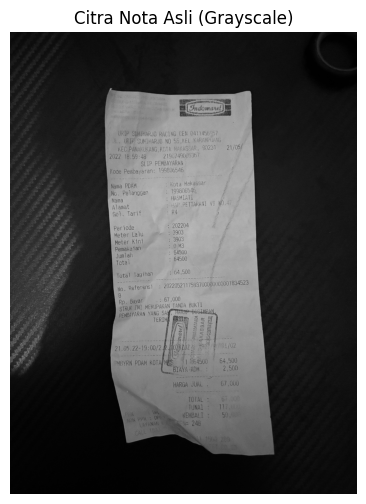

In [ ]:
image_path = 'gelap.jpg'
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Tidak dapat memuat citra dari {image_path}")
else:
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(6,6))
    plt.imshow(gray_image, cmap='gray')
    plt.title('Citra Nota Asli (Grayscale)')
    plt.axis('off')
    plt.show()

### 3. Penerapan Contrast Stretching (Peregangan Kontras)

Sel kode ini mengimplementasikan teknik _contrast stretching_ pada citra grayscale yang telah dimuat.
- Tujuan dari _contrast stretching_ adalah untuk meningkatkan kontras global pada citra dengan merentangkan rentang nilai intensitas pikselnya.
- Di sini, kita menggunakan fungsi `cv2.normalize()` dari OpenCV. Fungsi ini akan menormalisasi nilai piksel citra ke rentang baru yang ditentukan (dalam kasus ini 0 hingga 255) menggunakan metode `cv2.NORM_MINMAX`.
- Citra hasil _contrast stretching_ kemudian ditampilkan.

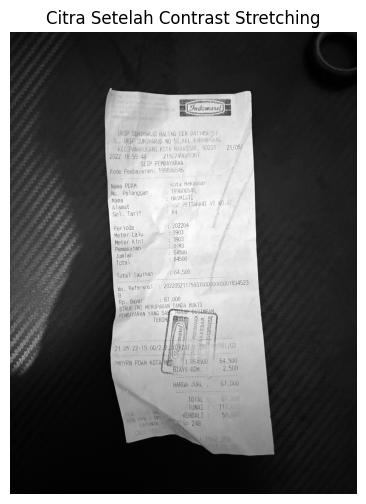

In [ ]:
if 'gray_image' in locals(): 
    
    stretched_image = cv2.normalize(gray_image, None, 0, 355, cv2.NORM_MINMAX)

    plt.figure(figsize=(6,6))
    plt.imshow(stretched_image, cmap='gray')
    plt.title('Citra Setelah Contrast Stretching')
    plt.axis('off')
    plt.show()
else:
    print("Error: 'gray_image' tidak ditemukan. Pastikan sel sebelumnya berhasil dijalankan.")

### 4. Penerapan Filter Penajaman Laplacian

Setelah kontras citra ditingkatkan, langkah selanjutnya adalah menajamkan detail pada citra, terutama teks. Sel ini melakukan hal tersebut menggunakan filter Laplacian.
1.  Filter Laplacian (`cv2.Laplacian()`) diterapkan pada `stretched_image`. Parameter `cv2.CV_64F` digunakan untuk tipe data output agar dapat mengakomodasi nilai negatif yang mungkin dihasilkan oleh filter.
2.  Hasil filter Laplacian (yang bisa berisi nilai negatif) kemudian dikonversi kembali ke tipe data `uint8` setelah mengambil nilai absolutnya (`cv2.convertScaleAbs()`) untuk keperluan visualisasi antara dari output filter.
3.  Untuk mendapatkan efek penajaman, citra hasil _contrast stretching_ (`stretched_image`) dikombinasikan (ditambahkan) dengan hasil filter Laplacian (sebelum diambil nilai absolutnya untuk mempertahankan arah perubahan). Dilakukan _clipping_ untuk memastikan nilai piksel tetap dalam rentang 0-255.
4.  Hasil filter Laplacian (setelah absolut) dan citra yang sudah ditajamkan (`sharpened_image`) kemudian ditampilkan.

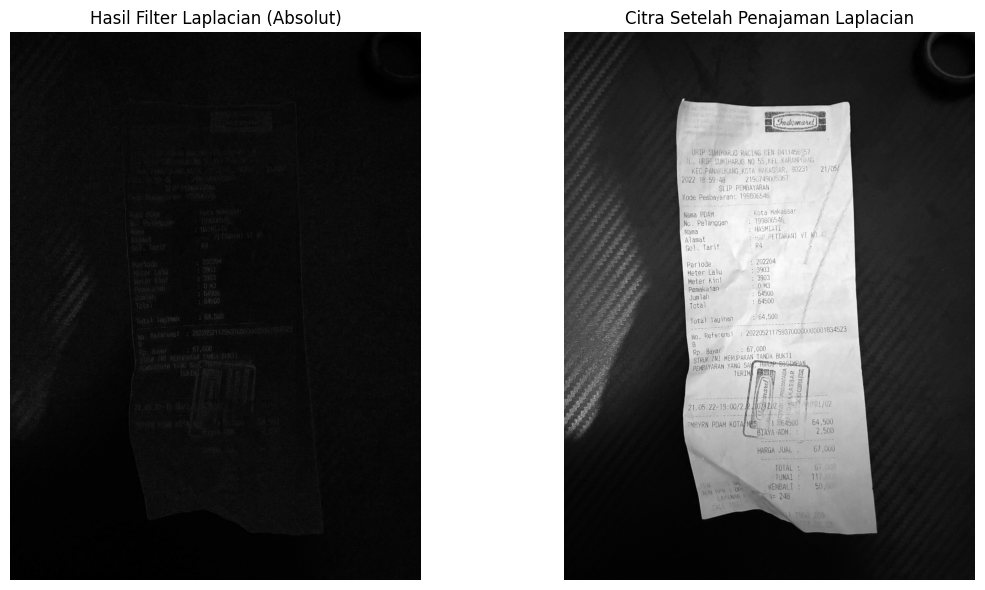

In [ ]:
if 'stretched_image' in locals(): 
    laplacian = cv2.Laplacian(stretched_image, cv2.CV_64F)
    laplacian_abs = cv2.convertScaleAbs(laplacian)

    sharpened_image_float = stretched_image.astype(np.float32) + laplacian.astype(np.float32) 
    sharpened_image_float = np.clip(sharpened_image_float, 0, 255)
    sharpened_image = sharpened_image_float.astype(np.uint8)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(laplacian_abs, cmap='gray')
    plt.title('Hasil Filter Laplacian (Absolut)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Citra Setelah Penajaman Laplacian')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'stretched_image' tidak ditemukan. Pastikan sel sebelumnya berhasil dijalankan.")

### 5. Perbandingan Hasil Pemrosesan Citra

Untuk memudahkan analisis dan perbandingan, sel kode ini menampilkan ketiga citra utama secara berdampingan:
1.  Citra Asli (Grayscale)
2.  Citra Setelah Contrast Stretching
3.  Citra Setelah Penajaman Laplacian (Hasil Akhir)

Visualisasi ini penting untuk melihat secara langsung efek dari setiap tahapan pemrosesan.

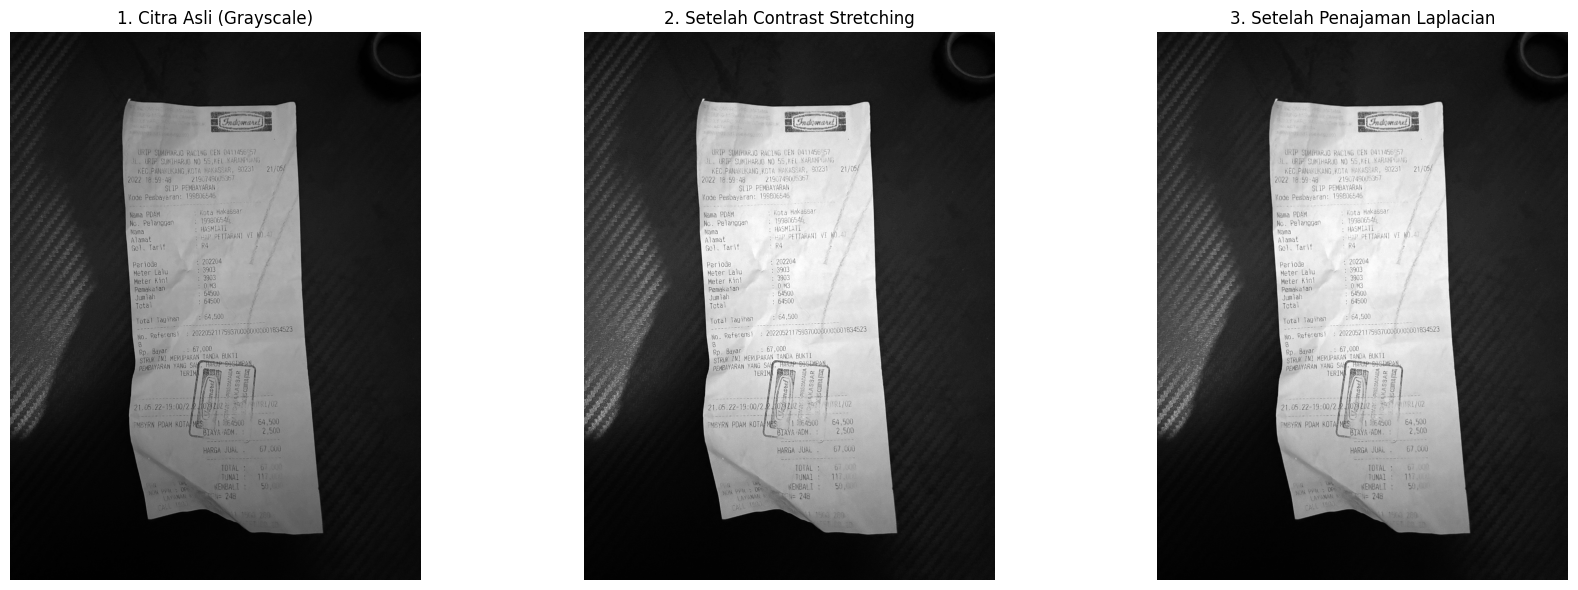

Gambar hasil telah disimpan.


In [ ]:
if 'gray_image' in locals() and 'stretched_image' in locals() and 'sharpened_image' in locals():
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('1. Citra Asli (Grayscale)')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(stretched_image, cmap='gray')
    plt.title('2. Setelah Contrast Stretching')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('3. Setelah Penajaman Laplacian')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    cv2.imwrite('nota_asli_gray.jpg', gray_image)
    cv2.imwrite('nota_stretched.jpg', stretched_image)
    cv2.imwrite('nota_sharpened.jpg', sharpened_image)
    print("Gambar hasil telah disimpan.")

else:
    print("Error: Satu atau lebih gambar yang dibutuhkan tidak ditemukan. Pastikan semua sel sebelumnya berhasil.")